In [ ]:
!pip install openmim
!mim install mmengine "mmcv>=2.0.1" "mmdet>=3.1.0" "mmpose>=1.1.0"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.3/297.3 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 22.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.4/239.4 kB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.1/953.1 kB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.8/143.8 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.7/89.7 kB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.0/94.0 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.1.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 450.3/450.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.3/99.3 MB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 75.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.0/436.0 kB 39.1 MB/s eta 0:00:00
  Created wheel for chumpy: filename=chumpy-0.70-py3-none-any.whl size=58280 sha256=7988e7ffea193e5067cf65cd40c10b0d57e509b2db2effb0108e8153069b7876
  Stored in directory: /root/.cache/pip/wheels/e0/c1/ef/29ba7be03653a29ef6f2c3e1956d6c4d8877f2b243af411db1
Successfully built chumpy


In [ ]:
from mmpose.apis import MMPoseInferencer
import requests
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from io import BytesIO
import cv2
from collections import defaultdict
from scipy.signal import medfilt
import copy

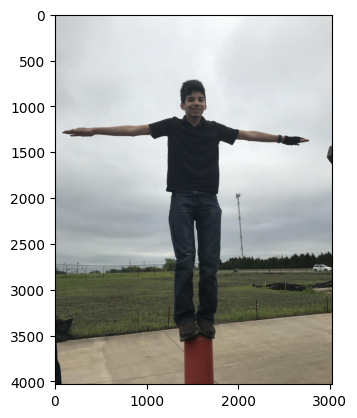

(4032, 3024, 3)


In [ ]:
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return img

def image_to_numpy_array(img):
    return np.array(img)

def load_video_frames(video_path):
    cap = cv2.VideoCapture(video_path)
    frames = []

    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frames.append(frame)

    cap.release()
    return frames

#image_url = 'https://hips.hearstapps.com/hmg-prod/images/squat-jump-squat-178-1653334247.jpg?crop=0.859xw:0.646xh;0.0481xw,0.342xh&resize=1200:*'
image_url = 'https://i.redd.it/yzi7qrdyc5r41.jpg'
image = load_image_from_url(image_url)
image_array = image_to_numpy_array(image)

plt.imshow(image_array)
plt.show()

print(image_array.shape)

In [ ]:
inferencer = MMPoseInferencer(pose3d='human3d')
result_generator = inferencer(image_array)
result = next(result_generator)

kpts = []

for _ in result:
  kpts.append(np.array(result['predictions'][0][0]['keypoints']))

kpts = np.array(kpts)

print(result.keys())
print(kpts.shape)
print(kpts)

Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/body_3d_keypoint/pose_lift/h36m/motionbert_ft_h36m-d80af323_20230531.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmpose/v1/projects/rtmposev1/rtmpose-m_simcc-body7_pt-body7_420e-256x192-e48f03d0_20230504.pth
Loads checkpoint by http backend from path: https://download.openmmlab.com/mmdetection/v3.0/rtmdet/rtmdet_m_8xb32-300e_coco/rtmdet_m_8xb32-300e_coco_20220719_112220-229f527c.pth


Output()

The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



dict_keys(['visualization', 'predictions'])
(2, 17, 3)
[[[-0.00000000e+00  0.00000000e+00  4.01790053e-01]
  [ 1.63713381e-01 -2.06224639e-02  3.71354014e-01]
  [ 1.24689452e-01  1.70440413e-03  2.23862320e-01]
  [ 8.75117183e-02  1.23674259e-01  0.00000000e+00]
  [ 3.72534171e-02 -1.73217133e-02  3.81333023e-01]
  [ 1.04248046e-03 -7.25078338e-04  2.17029303e-01]
  [-4.25224602e-02  1.08004905e-01  8.36721063e-03]
  [ 1.35925785e-01 -6.96322992e-02  7.43505359e-01]
  [ 1.76904783e-01 -1.25243440e-01  8.94035161e-01]
  [ 1.81411624e-01 -1.98299646e-01  1.02715778e+00]
  [ 1.80585936e-01 -1.68360218e-01  9.59098697e-01]
  [ 4.55200188e-02 -1.01000763e-01  9.64147925e-01]
  [-1.97343260e-01 -3.65058146e-02  6.33319855e-01]
  [-4.07801270e-01 -1.23964801e-01  6.20984912e-01]
  [ 2.99196780e-01 -1.16397731e-01  9.61013675e-01]
  [ 3.76273930e-01 -4.61014360e-02  5.91456056e-01]
  [ 6.12005830e-01 -1.27818793e-01  5.29772997e-01]]

 [[-0.00000000e+00  0.00000000e+00  4.01790053e-01]
  [ 1.6

In [ ]:
kpt_dict = {0: 'hips',
            1: 'hip_right',
            2: 'knee_right',
            3: 'feet_right',
            4: 'hip_left',
            5: 'knee_left',
            6: 'feet_left',
            7: 'spine_middle',
            8: 'spine_upper',
            9: 'neck',
            10: 'head_high',
            11: 'shoulder_left',
            12: 'elbow_left',
            13: 'hand_left',
            14: 'shoulder_right',
            15: 'elbow_right',
            16: 'hand_right'}

# Reverse the dictionary
reversed_kpt_dict = {value: key for key, value in kpt_dict.items()}

# Print the reversed dictionary
print(reversed_kpt_dict)

{'hips': 0, 'hip_right': 1, 'knee_right': 2, 'feet_right': 3, 'hip_left': 4, 'knee_left': 5, 'feet_left': 6, 'spine_middle': 7, 'spine_upper': 8, 'neck': 9, 'head_high': 10, 'shoulder_left': 11, 'elbow_left': 12, 'hand_left': 13, 'shoulder_right': 14, 'elbow_right': 15, 'hand_right': 16}


In [ ]:

def unit_vector(vector):
    """ Returns the unit vector of the vector."""
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    """ Returns the angle in radians between vectors 'v1' and 'v2'::

            >>> angle_between((1, 0, 0), (0, 1, 0))
            1.5707963267948966
            >>> angle_between((1, 0, 0), (1, 0, 0))
            0.0
            >>> angle_between((1, 0, 0), (-1, 0, 0))
            3.141592653589793

        https://stackoverflow.com/questions/2827393/angles-between-two-n-dimensional-vectors-in-python
    """
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)

    radians_angle = np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))
    degrees_angle = np.degrees(radians_angle)

    # Ensure the angle is between 0 and 360 degrees
    return (degrees_angle + 360) % 360

def Get_R(A,B):
    uA = A/np.sqrt(np.sum(np.square(A)))
    uB = B/np.sqrt(np.sum(np.square(B)))

    cos_t = np.sum(uA * uB)
    sin_t = np.sqrt(np.sum(np.square(np.cross(uA,uB)))) #magnitude

    u = uA
    v = uB - np.sum(uA * uB)*uA
    v = v/np.sqrt(np.sum(np.square(v)))
    w = np.cross(uA, uB)
    w = w/np.sqrt(np.sum(np.square(w)))

    C = np.array([u, v, w])
    R_uvw = np.array([[cos_t, -sin_t, 0],
                      [sin_t, cos_t, 0],
                      [0, 0, 1]])

    R = C.T @ R_uvw @ C
    return R

def Decompose_R_ZXY(R):
    thetaz = np.arctan2(-R[0,1], R[1,1])
    thetay = np.arctan2(-R[2,0], R[2,2])
    thetax = np.arctan2(R[2,1], np.sqrt(R[2,0]**2 + R[2,2]**2))

    return (360 + np.degrees(thetaz)) % 360, (360 + np.degrees(thetay)) % 360, (360 + np.degrees(thetax)) % 360

joints = defaultdict(list)

def convert_to_dictionary(kpts):
    #its easier to manipulate keypoints by joint name
    kpts_dict = {}
    for key, k_index in reversed_kpt_dict.items():
        kpts_dict[key] = kpts[:,k_index]

    kpts_dict['joints'] = np.array(list(reversed_kpt_dict.keys()))

    return kpts_dict

def add_hips_and_neck(kpts):
    #define the hierarchy of the joints
    hierarchy = {'hips': [],
                 'hip_left': ['hips'], 'knee_left': ['hip_left', 'hips'], 'feet_left': ['knee_right', 'hip_left', 'hips'],
                 'hip_right': ['hips'], 'knee_right': ['hip_right', 'hips'], 'feet_right': ['knee_right', 'hip_right', 'hips'],
                 'spine_middle': ['hips'],
                 'spine_upper': ['spine_middle', 'hips'],
                 'neck': ['spine_upper', 'spine_middle', 'hips'],
                 'head_high': ['neck', 'spine_upper', 'spine_middle', 'hips'],
                 'shoulder_left': ['spine_upper', 'hips'], 'elbow_left': ['shoulder_left', 'spine_upper', 'hips'], 'hand_left': ['elbow_left', 'shoulder_left', 'spine_upper', 'hips'],
                 'shoulder_right': ['spine_upper', 'hips'], 'elbow_right': ['shoulder_right', 'spine_upper', 'hips'], 'hand_right': ['elbow_right', 'shoulder_right', 'spine_upper', 'hips']
                }

    kpts['hierarchy'] = hierarchy
    kpts['root_joint'] = 'hips'

    return kpts

def median_filter(kpts, window_size = 3):
    filtered = copy.deepcopy(kpts)

    #apply median filter to get rid of poor keypoints estimations
    for joint in filtered['joints']:
        joint_kpts = filtered[joint]
        xs = joint_kpts[:,0]
        ys = joint_kpts[:,1]
        zs = joint_kpts[:,2]
        xs = medfilt(xs, window_size)
        ys = medfilt(ys, window_size)
        zs = medfilt(zs, window_size)
        filtered[joint] = np.stack([xs, ys, zs], axis = -1)

    return filtered

def get_bone_lengths(kpts):
    bone_lengths = {}
    for joint in kpts['joints']:
        if joint == 'hips': continue
        parent = kpts['hierarchy'][joint][0]

        joint_kpts = kpts[joint]
        parent_kpts = kpts[parent]

        _bone = joint_kpts - parent_kpts
        _bone_lengths = np.sqrt(np.sum(np.square(_bone), axis = -1))

        _bone_length = np.median(_bone_lengths)
        bone_lengths[joint] = _bone_length

    kpts['bone_lengths'] = bone_lengths

    return kpts

def get_base_skeleton(kpts, normalization_bone = 'spine_upper'):

    #this defines a generic skeleton to which we can apply rotations to
    body_lengths = kpts['bone_lengths']

    #define skeleton offset directions
    offset_directions = {}
    offset_directions['hip_left'] = np.array([1,0,0])
    offset_directions['knee_left'] = np.array([0,-1, 0])
    offset_directions['feet_left'] = np.array([0,-1, 0])

    offset_directions['hip_right'] = np.array([-1,0,0])
    offset_directions['knee_right'] = np.array([0,-1, 0])
    offset_directions['feet_right'] = np.array([0,-1, 0])

    offset_directions['spine_middle'] = np.array([0,1,0])
    offset_directions['spine_upper'] = np.array([0,1,0])
    offset_directions['neck'] = np.array([0,1,0])
    offset_directions['head_high'] = np.array([0,1,0])

    offset_directions['shoulder_left'] = np.array([1,0,0])
    offset_directions['elbow_left'] = np.array([1,0,0])
    offset_directions['hand_left'] = np.array([1,0,0])

    offset_directions['shoulder_right'] = np.array([-1,0,0])
    offset_directions['elbow_right'] = np.array([-1,0,0])
    offset_directions['hand_right'] = np.array([-1,0,0])

    #set bone normalization length. Set to 1 if you dont want normalization
    normalization = kpts['bone_lengths'][normalization_bone]
    #normalization = 1


    #base skeleton set by multiplying offset directions by measured bone lengths. In this case we use the average of two sided limbs. E.g left and right hip averaged
    base_skeleton = {'hips': np.array([0,0,0])}
    def _set_length(joint_type):
        base_skeleton[joint_type + '_left'] = offset_directions[joint_type + '_left'] * ((body_lengths[joint_type + '_left'] + body_lengths[joint_type + '_right'])/(2 * normalization))
        base_skeleton[joint_type + '_right'] = offset_directions[joint_type + '_right'] * ((body_lengths[joint_type + '_left'] + body_lengths[joint_type + '_right'])/(2 * normalization))

    _set_length('hip')
    _set_length('knee')
    _set_length('feet')
    _set_length('shoulder')
    _set_length('elbow')
    _set_length('hand')
    base_skeleton['spine_middle'] = offset_directions['spine_middle'] * (body_lengths['spine_middle']/normalization)
    base_skeleton['spine_upper'] = offset_directions['spine_upper'] * (body_lengths['spine_upper']/normalization)
    base_skeleton['neck'] = offset_directions['neck'] * (body_lengths['neck']/normalization)
    base_skeleton['head_high'] = offset_directions['head_high'] * (body_lengths['head_high']/normalization)

    kpts['offset_directions'] = offset_directions
    kpts['base_skeleton'] = base_skeleton
    kpts['normalization'] = normalization

    return kpts

for kpt in kpts:
    a = kpt[4]
    b = kpt[5]
    c = kpt[6]

    ba = a - b
    bc = c - b

    R1 = Get_R(ba, bc)
    z1, y1, x1 = Decompose_R_ZXY(R1)
    joints['knee_left_x'].append(x1)
    joints['knee_left_y'].append(y1)
    joints['knee_left_z'].append(z1)

    a = kpt[1]
    b = kpt[2]
    c = kpt[3]

    ba = a - b
    bc = c - b

    R1 = Get_R(ba, bc)
    z1, y1, x1 = Decompose_R_ZXY(R1)
    joints['knee_right_x'].append(x1)
    joints['knee_right_y'].append(y1)
    joints['knee_right_z'].append(z1)

kpts = np.array(kpts)
kpts_dict = convert_to_dictionary(kpts)
hierarichal_kpts = add_hips_and_neck(kpts_dict)
bone_len = get_bone_lengths(hierarichal_kpts)
get_base_skeleton(bone_len)

kpts = bone_len


In [ ]:
#general rotation matrices
def get_R_x(theta):
    R = np.array([[1, 0, 0],
                  [0, np.cos(theta), -np.sin(theta)],
                  [0, np.sin(theta),  np.cos(theta)]])
    return R

def get_R_y(theta):
    R = np.array([[np.cos(theta), 0, np.sin(theta)],
                  [0, 1, 0],
                  [-np.sin(theta), 0,  np.cos(theta)]])
    return R

def get_R_z(theta):
    R = np.array([[np.cos(theta), -np.sin(theta), 0],
                  [np.sin(theta), np.cos(theta), 0],
                  [0, 0, 1]])
    return R


#calculate rotation matrix to take A vector to B vector
def Get_R(A,B):

    #get unit vectors
    uA = A/np.sqrt(np.sum(np.square(A)))
    uB = B/np.sqrt(np.sum(np.square(B)))

    #get products
    dotprod = np.sum(uA * uB)
    crossprod = np.sqrt(np.sum(np.square(np.cross(uA,uB)))) #magnitude

    #get new unit vectors
    u = uA
    v = uB - dotprod*uA
    v = v/np.sqrt(np.sum(np.square(v)))
    w = np.cross(uA, uB)
    w = w/np.sqrt(np.sum(np.square(w)))

    #get change of basis matrix
    C = np.array([u, v, w])

    #get rotation matrix in new basis
    R_uvw = np.array([[dotprod, -crossprod, 0],
                      [crossprod, dotprod, 0],
                      [0, 0, 1]])

    #full rotation matrix
    R = C.T @ R_uvw @ C
    #print(R)
    return R

#Same calculation as above using a different formalism
def Get_R2(A, B):

    #get unit vectors
    uA = A/np.sqrt(np.sum(np.square(A)))
    uB = B/np.sqrt(np.sum(np.square(B)))

    v = np.cross(uA, uB)
    s = np.sqrt(np.sum(np.square(v)))
    c = np.sum(uA * uB)

    vx = np.array([[0, -v[2], v[1]],
                   [v[2], 0, -v[0]],
                   [-v[1], v[0], 0]])

    R = np.eye(3) + vx + vx@vx*((1-c)/s**2)

    return R


#decomposes given R matrix into rotation along each axis. In this case Rz @ Ry @ Rx
def Decompose_R_ZYX(R):

    #decomposes as RzRyRx. Note the order: ZYX <- rotation by x first
    thetaz = np.arctan2(R[1,0], R[0,0])
    thetay = np.arctan2(-R[2,0], np.sqrt(R[2,1]**2 + R[2,2]**2))
    thetax = np.arctan2(R[2,1], R[2,2])

    return thetaz, thetay, thetax

def Decompose_R_ZXY(R):

    #decomposes as RzRXRy. Note the order: ZXY <- rotation by y first
    thetaz = np.arctan2(-R[0,1], R[1,1])
    thetay = np.arctan2(-R[2,0], R[2,2])
    thetax = np.arctan2(R[2,1], np.sqrt(R[2,0]**2 + R[2,2]**2))

    return thetaz, thetay, thetax

In [ ]:
def get_hips_position_and_rotation(frame_pos, root_joint = 'hips', root_define_joints = ['hip_left', 'neck']):

    #root position is saved directly
    root_position = frame_pos[root_joint]

    #calculate unit vectors of root joint
    root_u = frame_pos[root_define_joints[0]] - frame_pos[root_joint]
    root_u = root_u/np.sqrt(np.sum(np.square(root_u)))
    root_v = frame_pos[root_define_joints[1]] - frame_pos[root_joint]
    root_v = root_v/np.sqrt(np.sum(np.square(root_v)))
    root_w = np.cross(root_u, root_v)

    #Make the rotation matrix
    C = np.array([root_u, root_v, root_w]).T
    thetaz,thetay, thetax = Decompose_R_ZXY(C)
    root_rotation = np.array([thetaz, thetax, thetay])

    return root_position, root_rotation

In [ ]:
def get_joint_rotations(joint_name, joints_hierarchy, joints_offsets, frame_rotations, frame_pos):

    _invR = np.eye(3)
    for i, parent_name in enumerate(joints_hierarchy[joint_name]):
        if i == 0: continue
        _r_angles = frame_rotations[parent_name]
        R = get_R_z(_r_angles[0]) @ get_R_x(_r_angles[1]) @ get_R_y(_r_angles[2])
        _invR = _invR@R.T

    b = _invR @ (frame_pos[joint_name] - frame_pos[joints_hierarchy[joint_name][0]])

    _R = Get_R2(joints_offsets[joint_name], b)
    tz, ty, tx = Decompose_R_ZXY(_R)
    joint_rs = np.array([tz, tx, ty])
    #print(np.degrees(joint_rs))

    return joint_rs

In [ ]:
def calculate_joint_angles(kpts):

    #set up emtpy container for joint angles
    for joint in kpts['joints']:
        kpts[joint+'_angles'] = []

    for framenum in range(kpts['hips'].shape[0]):

        #get the keypoints positions in the current frame
        frame_pos = {}
        for joint in kpts['joints']:
            frame_pos[joint] = kpts[joint][framenum]

        root_position, root_rotation = get_hips_position_and_rotation(frame_pos)

        frame_rotations = {'hips': root_rotation}

        #center the body pose
        for joint in kpts['joints']:
            frame_pos[joint] = frame_pos[joint] - root_position

        #get the max joints connectsion
        max_connected_joints = 0
        for joint in kpts['joints']:
            if len(kpts['hierarchy'][joint]) > max_connected_joints:
                max_connected_joints = len(kpts['hierarchy'][joint])

        depth = 2
        while(depth <= max_connected_joints):
            for joint in kpts['joints']:
                if len(kpts['hierarchy'][joint]) == depth:
                    joint_rs = get_joint_rotations(joint, kpts['hierarchy'], kpts['offset_directions'], frame_rotations, frame_pos)
                    parent = kpts['hierarchy'][joint][0]
                    frame_rotations[parent] = joint_rs
            depth += 1

        #for completeness, add zero rotation angles for endpoints. This is not necessary as they are never used.
        for _j in kpts['joints']:
            if _j not in list(frame_rotations.keys()):
                frame_rotations[_j] = np.array([0.,0.,0.])

        #update dictionary with current angles.
        for joint in kpts['joints']:
            kpts[joint + '_angles'].append(frame_rotations[joint])


    #convert joint angles list to numpy arrays.
    for joint in kpts['joints']:
        kpts[joint+'_angles'] = np.array(kpts[joint + '_angles'])
        #print(joint, kpts[joint+'_angles'].shape)

    return

In [ ]:
calculate_joint_angles(kpts)

In [ ]:
def get_rotation_chain(joint, hierarchy, frame_rotations):

    hierarchy = hierarchy[::-1]

    #this code assumes ZXY rotation order
    R = np.eye(3)
    for parent in hierarchy:
        angles = frame_rotations[parent]
        _R = get_R_z(angles[0])@get_R_x(angles[1])@get_R_y(angles[2])
        R = R @ _R

    return R

In [ ]:
def draw_skeleton_from_joint_angles(kpts):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for framenum in range(kpts['hips'].shape[0]):

        #get a dictionary containing the rotations for the current frame
        frame_rotations = {}
        for joint in kpts['joints']:
            frame_rotations[joint] = kpts[joint+'_angles'][framenum]

        #for plotting
        for _j in kpts['joints']:
            if _j == 'hips': continue

            #get hierarchy of how the joint connects back to root joint
            hierarchy = kpts['hierarchy'][_j]

            #get the current position of the parent joint
            r1 = kpts['hips'][framenum]/kpts['normalization']
            for parent in hierarchy:
                if parent == 'hips': continue
                R = get_rotation_chain(parent, kpts['hierarchy'][parent], frame_rotations)
                r1 = r1 + R @ kpts['base_skeleton'][parent]

            #get the current position of the joint. Note: r2 is the final position of the joint. r1 is simply calculated for plotting.
            r2 = r1 + get_rotation_chain(hierarchy[0], hierarchy, frame_rotations) @ kpts['base_skeleton'][_j]
            plt.plot(xs = [r1[0], r2[0]], ys = [r1[1], r2[1]], zs = [r1[2], r2[2]], color = 'red')

        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
        ax.azim = 90
        ax.elev = -85
        ax.set_title('Pose from joint angles')
        ax.set_xlim3d(-4, 4)
        ax.set_xlabel('x')
        ax.set_ylim3d(-4, 4)
        ax.set_ylabel('y')
        ax.set_zlim3d(-4, 4)
        ax.set_zlabel('z')
        plt.pause(0.01)
        ax.cla()
    plt.close()

def draw_skeleton_from_joint_coordinates(kpts):

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    connections = [['hips', 'hip_left'], ['hip_left', 'knee_left'], ['leftknee', 'feet_left'],
                   ['hips', 'hip_right'], ['hip_right', 'knee_right'], ['rightknee', 'rightfoot'],
                   ['hips', 'spine_middle'], ['spine_middle', 'spine_upper'], ['spine_upper', 'neck'], ['neck', 'head_high'], ['spine_upper', 'shoulder_left'], ['shoulder_left', 'elbow_left'], ['elbow_left', 'hand_left'],
                   ['spine_upper', 'shoulder_right'], ['shoulder_right', 'elbow_right'], ['elbow_right', 'hand_right']
                  ]

    for framenum in range(kpts['hip_left'].shape[0]):
        print(framenum)
        if framenum%2 == 0: continue #skip every 2nd frame

        for _j in kpts['joints']:
            if _j == 'hips': continue
            _p = kpts['hierarchy'][_j][0] #get the name of the parent joint
            r1 = kpts[_p][framenum]
            r2 = kpts[_j][framenum]
            plt.plot(xs = [r1[0], r2[0]], ys = [r1[1], r2[1]], zs = [r1[2], r2[2]], color = 'blue')

        #ax.set_axis_off()
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])

        ax.set_xlim3d(-10, 10)
        ax.set_xlabel('x')
        ax.set_ylim3d(-10, 10)
        ax.set_ylabel('y')
        ax.set_zlim3d(-10, 10)
        ax.set_zlabel('z')
        plt.pause(0.1)
        ax.cla()
    plt.close()

In [ ]:
kpts

{'hips': array([[-0.        ,  0.        ,  0.40179005],
        [-0.        ,  0.        ,  0.40179005]]),
 'hip_right': array([[ 0.16371338, -0.02062246,  0.37135401],
        [ 0.16371338, -0.02062246,  0.37135401]]),
 'knee_right': array([[0.12468945, 0.0017044 , 0.22386232],
        [0.12468945, 0.0017044 , 0.22386232]]),
 'feet_right': array([[0.08751172, 0.12367426, 0.        ],
        [0.08751172, 0.12367426, 0.        ]]),
 'hip_left': array([[ 0.03725342, -0.01732171,  0.38133302],
        [ 0.03725342, -0.01732171,  0.38133302]]),
 'knee_left': array([[ 0.00104248, -0.00072508,  0.2170293 ],
        [ 0.00104248, -0.00072508,  0.2170293 ]]),
 'feet_left': array([[-0.04252246,  0.10800491,  0.00836721],
        [-0.04252246,  0.10800491,  0.00836721]]),
 'spine_middle': array([[ 0.13592578, -0.0696323 ,  0.74350536],
        [ 0.13592578, -0.0696323 ,  0.74350536]]),
 'spine_upper': array([[ 0.17690478, -0.12524344,  0.89403516],
        [ 0.17690478, -0.12524344,  0.8940351

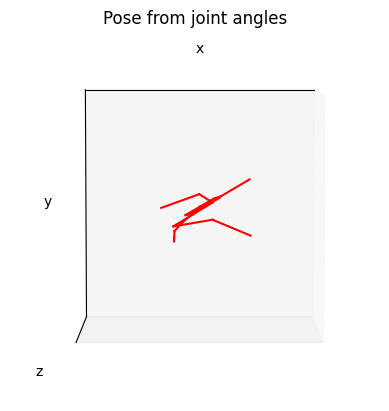

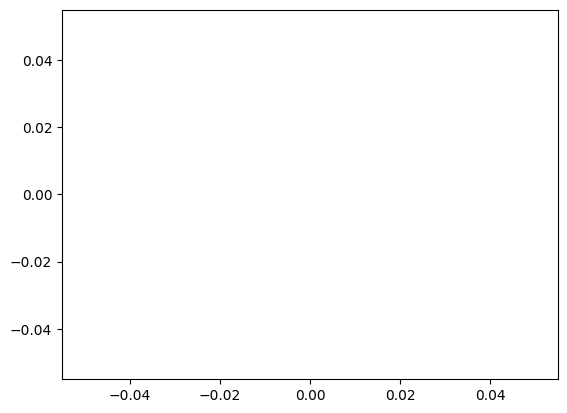

0
1


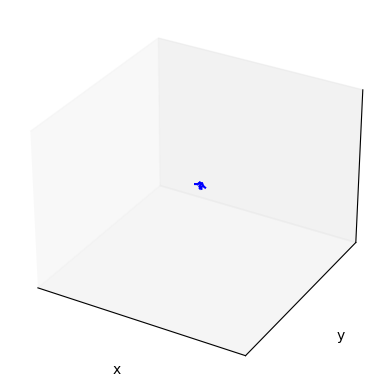

In [ ]:
draw_skeleton_from_joint_angles(kpts)
draw_skeleton_from_joint_coordinates(kpts)

In [ ]:
360 -joints['knee_left_x'][0]

20.160653659616344

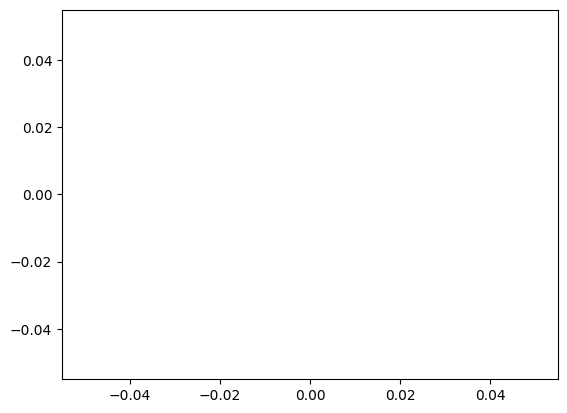

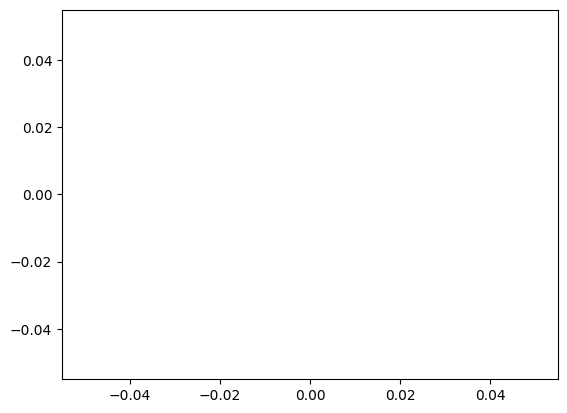

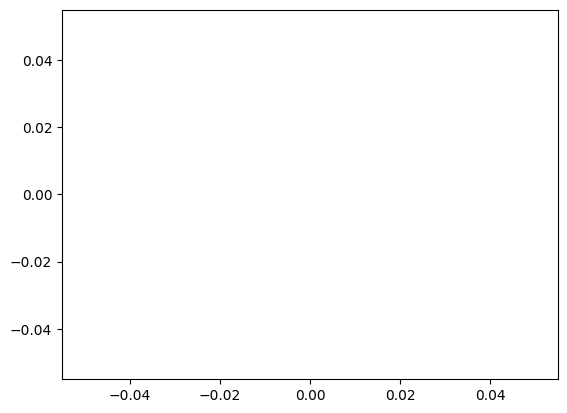

In [ ]:
def simple_moving_average(data, window_size):
    if window_size <= 0:
        raise ValueError("Window size must be a positive integer.")

    moving_averages = []
    for i in range(len(data) - window_size + 1):
        window = data[i : i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)

    return moving_averages

window_size = 10

plt.plot(simple_moving_average(joints['knee_left_x'], window_size))
plt.plot(simple_moving_average(joints['knee_right_x'], window_size))
plt.show()

plt.plot(simple_moving_average(joints['knee_left_y'], window_size))
plt.plot(simple_moving_average(joints['knee_right_y'], window_size))
plt.show()

plt.plot(simple_moving_average(joints['knee_left_z'], window_size))
plt.plot(simple_moving_average(joints['knee_right_z'], window_size))
plt.show()

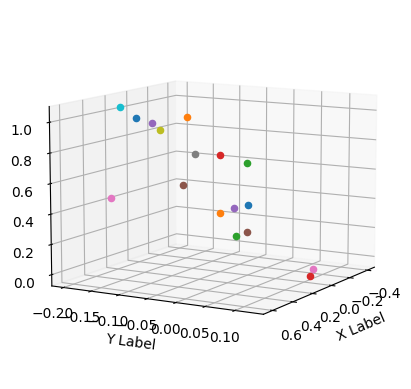

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for k in kpt:
    x, y, z = k
    ax.scatter(x, y, z, marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(10, 30, 0)

plt.show()